In [1]:
# API：
# tf.random.categorical #随机采样
# tf.expand_dims(input_eval, 0)#增加维度
# tf.squeeze(predictions, 0)#减少维度

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
import os
print(tf.__name__, tf.__version__)

tensorflow 2.1.0


In [3]:
# import requests
# import os
# url = 'http://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt'

# r = requests.get(url)
# # print(r.text)
# with open('data/shakespeare.txt','w') as f:
#     f.write(r.text)

In [4]:
# http://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt
input_filepath = "data/shakespeare.txt"
text = open(input_filepath, 'r').read()

print(len(text))
print(text[0:100])

1115394
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You


In [5]:
# 数据处理
# 1.generate vocab
# 2.build mapping char ->id
# 3.data -> id_data
# 4.abcd  -> bcd<eos>
vocab = sorted(set(text))

print(len(vocab))
print(vocab)


65
['\n', ' ', '!', '$', '&', "'", ',', '-', '.', '3', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [6]:
char_to_idx = {char: idx for idx, char in enumerate(vocab)}
#enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列
print(char_to_idx)


{'\n': 0, ' ': 1, '!': 2, '$': 3, '&': 4, "'": 5, ',': 6, '-': 7, '.': 8, '3': 9, ':': 10, ';': 11, '?': 12, 'A': 13, 'B': 14, 'C': 15, 'D': 16, 'E': 17, 'F': 18, 'G': 19, 'H': 20, 'I': 21, 'J': 22, 'K': 23, 'L': 24, 'M': 25, 'N': 26, 'O': 27, 'P': 28, 'Q': 29, 'R': 30, 'S': 31, 'T': 32, 'U': 33, 'V': 34, 'W': 35, 'X': 36, 'Y': 37, 'Z': 38, 'a': 39, 'b': 40, 'c': 41, 'd': 42, 'e': 43, 'f': 44, 'g': 45, 'h': 46, 'i': 47, 'j': 48, 'k': 49, 'l': 50, 'm': 51, 'n': 52, 'o': 53, 'p': 54, 'q': 55, 'r': 56, 's': 57, 't': 58, 'u': 59, 'v': 60, 'w': 61, 'x': 62, 'y': 63, 'z': 64}


In [7]:
idx_to_char = np.array(vocab)
print(idx_to_char)

['\n' ' ' '!' '$' '&' "'" ',' '-' '.' '3' ':' ';' '?' 'A' 'B' 'C' 'D' 'E'
 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W'
 'X' 'Y' 'Z' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o'
 'p' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']


In [8]:
text_as_int = np.array([char_to_idx[c] for c in text])
print(text_as_int[0:100])

[18 47 56 57 58  1 15 47 58 47 64 43 52 10  0 14 43 44 53 56 43  1 61 43
  1 54 56 53 41 43 43 42  1 39 52 63  1 44 59 56 58 46 43 56  6  1 46 43
 39 56  1 51 43  1 57 54 43 39 49  8  0  0 13 50 50 10  0 31 54 43 39 49
  6  1 57 54 43 39 49  8  0  0 18 47 56 57 58  1 15 47 58 47 64 43 52 10
  0 37 53 59]


In [9]:
def split_input_target(id_text):
    # 4.abcde  -> abcd, bcde
    return id_text[0:-1],  id_text[1:]
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)
seq_length = 100
seq_dataset = char_dataset.batch(seq_length + 1, 
                                                 drop_remainder = True)
# drop_remainder 做batch最后如果不够就丢掉
for ch_id in char_dataset.take(2):
    print(ch_id, idx_to_char[ch_id.numpy()])
for seq_id in seq_dataset.take(2):
    print(seq_id)
    print(repr(''.join(idx_to_char[seq_id.numpy()])))# repr 显示特殊字符

tf.Tensor(18, shape=(), dtype=int64) F
tf.Tensor(47, shape=(), dtype=int64) i
tf.Tensor(
[18 47 56 57 58  1 15 47 58 47 64 43 52 10  0 14 43 44 53 56 43  1 61 43
  1 54 56 53 41 43 43 42  1 39 52 63  1 44 59 56 58 46 43 56  6  1 46 43
 39 56  1 51 43  1 57 54 43 39 49  8  0  0 13 50 50 10  0 31 54 43 39 49
  6  1 57 54 43 39 49  8  0  0 18 47 56 57 58  1 15 47 58 47 64 43 52 10
  0 37 53 59  1], shape=(101,), dtype=int64)
'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '
tf.Tensor(
[39 56 43  1 39 50 50  1 56 43 57 53 50 60 43 42  1 56 39 58 46 43 56  1
 58 53  1 42 47 43  1 58 46 39 52  1 58 53  1 44 39 51 47 57 46 12  0  0
 13 50 50 10  0 30 43 57 53 50 60 43 42  8  1 56 43 57 53 50 60 43 42  8
  0  0 18 47 56 57 58  1 15 47 58 47 64 43 52 10  0 18 47 56 57 58  6  1
 63 53 59  1 49], shape=(101,), dtype=int64)
'are all resolved rather to die than to famish?\n\nAll:\nResolved. resolved.\n\nFirst Citizen:\nFirst, you k'


In [10]:
seq_dataset = seq_dataset.map(split_input_target)

for item_input, item_output in seq_dataset.take(2):
    print(item_input.numpy())
    print(item_output.numpy())

[18 47 56 57 58  1 15 47 58 47 64 43 52 10  0 14 43 44 53 56 43  1 61 43
  1 54 56 53 41 43 43 42  1 39 52 63  1 44 59 56 58 46 43 56  6  1 46 43
 39 56  1 51 43  1 57 54 43 39 49  8  0  0 13 50 50 10  0 31 54 43 39 49
  6  1 57 54 43 39 49  8  0  0 18 47 56 57 58  1 15 47 58 47 64 43 52 10
  0 37 53 59]
[47 56 57 58  1 15 47 58 47 64 43 52 10  0 14 43 44 53 56 43  1 61 43  1
 54 56 53 41 43 43 42  1 39 52 63  1 44 59 56 58 46 43 56  6  1 46 43 39
 56  1 51 43  1 57 54 43 39 49  8  0  0 13 50 50 10  0 31 54 43 39 49  6
  1 57 54 43 39 49  8  0  0 18 47 56 57 58  1 15 47 58 47 64 43 52 10  0
 37 53 59  1]
[39 56 43  1 39 50 50  1 56 43 57 53 50 60 43 42  1 56 39 58 46 43 56  1
 58 53  1 42 47 43  1 58 46 39 52  1 58 53  1 44 39 51 47 57 46 12  0  0
 13 50 50 10  0 30 43 57 53 50 60 43 42  8  1 56 43 57 53 50 60 43 42  8
  0  0 18 47 56 57 58  1 15 47 58 47 64 43 52 10  0 18 47 56 57 58  6  1
 63 53 59  1]
[56 43  1 39 50 50  1 56 43 57 53 50 60 43 42  1 56 39 58 46 43 56  1 58
 53  1 42

In [11]:
batch_size = 64
buffer_size = 10000
seq_dataset = seq_dataset.shuffle(buffer_size).batch(
                      batch_size, drop_remainder = True)

In [12]:
vocab_size = len(vocab)
embedding_dim = 256
rnn_units = 1024

def build_model(vocab_size, embedding_dim, rnn_units,batch_size):
    model = keras.models.Sequential([
        keras.layers.Embedding(vocab_size, embedding_dim,
                              batch_input_shape = [batch_size, None]),
        keras.layers.SimpleRNN(units= rnn_units,
                                          return_sequences = True),
        keras.layers.Dense(vocab_size)
    ])
    return model

model = build_model(
        vocab_size = vocab_size,
        embedding_dim=embedding_dim,
        rnn_units = rnn_units,
        batch_size=batch_size
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (64, None, 256)           16640     
_________________________________________________________________
simple_rnn (SimpleRNN)       (64, None, 1024)          1311744   
_________________________________________________________________
dense (Dense)                (64, None, 65)            66625     
Total params: 1,395,009
Trainable params: 1,395,009
Non-trainable params: 0
_________________________________________________________________


In [13]:
# 用定义好的模型做预测
for input_example_batch, target_example_batch in seq_dataset.take(1):
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape)

(64, 100, 65)


In [14]:
#随机采样，random sampling
#greedy贪心策略，random随机策略
sample_indices = tf.random.categorical(
    logits = example_batch_predictions[0], num_samples = 1)
print(sample_indices)
#(100, 65) -> (100, 1)
sample_indices = tf.squeeze(sample_indices, axis =1)

tf.Tensor(
[[31]
 [ 7]
 [46]
 [55]
 [64]
 [11]
 [29]
 [35]
 [22]
 [50]
 [50]
 [26]
 [57]
 [18]
 [15]
 [25]
 [ 1]
 [33]
 [38]
 [56]
 [41]
 [56]
 [26]
 [10]
 [29]
 [35]
 [20]
 [12]
 [22]
 [42]
 [14]
 [ 9]
 [29]
 [26]
 [ 6]
 [61]
 [ 2]
 [18]
 [49]
 [33]
 [48]
 [34]
 [20]
 [43]
 [51]
 [62]
 [10]
 [48]
 [29]
 [10]
 [64]
 [61]
 [46]
 [51]
 [17]
 [11]
 [ 4]
 [18]
 [51]
 [46]
 [34]
 [47]
 [ 2]
 [55]
 [12]
 [ 6]
 [49]
 [21]
 [16]
 [44]
 [28]
 [22]
 [30]
 [44]
 [47]
 [ 9]
 [46]
 [54]
 [ 6]
 [64]
 [20]
 [46]
 [55]
 [18]
 [50]
 [20]
 [ 7]
 [27]
 [ 4]
 [56]
 [18]
 [11]
 [55]
 [46]
 [47]
 [53]
 [32]
 [37]
 [29]
 [37]], shape=(100, 1), dtype=int64)


In [15]:
print('Input', repr("".join(idx_to_char[input_example_batch[0]])))
print()
print('Output', repr("".join(idx_to_char[target_example_batch[0]])))
print()
print('Predictions', repr("".join(idx_to_char[sample_indices])))
# 模型还没有训练，Predictions打出无需字母

Input 'der,\nAnd issue forth and bid them battle straight.\n\nYORK:\nFive men to twenty! though the odds be gre'

Output 'er,\nAnd issue forth and bid them battle straight.\n\nYORK:\nFive men to twenty! though the odds be grea'

Predictions 'S-hqz;QWJllNsFCM UZrcrN:QWH?JdB3QN,w!FkUjVHemx:jQ:zwhmE;&FmhVi!q?,kIDfPJRfi3hp,zHhqFlH-O&rF;qhioTYQY'


In [16]:
# 自定义损失函数
def loss(labels, logits):
    return keras.losses.sparse_categorical_crossentropy(
            labels, logits, from_logits = True)

model.compile(optimizer = 'adam', loss = loss)
example_loss = loss(target_example_batch, example_batch_predictions)
print(example_loss.shape)
print(example_loss.numpy().mean())


(64, 100)
4.185625


In [17]:
# 保存模型
output_dir = 'data/text_generation_lstm'
if not os.path.exists(output_dir):
    os.mkdir(output_dir)
    
checkpoint_prefix = os.path.join(output_dir, 'ckpt_{epoch}')
checkpoint_callback = keras.callbacks.ModelCheckpoint(
        filepath = checkpoint_prefix,
        save_weights_only = True)

epochs = 50
history = model.fit(seq_dataset, epochs = epochs,
                           callbacks = [checkpoint_callback])

Train for 172 steps
Epoch 1/50
172/172 [==============================] - 9s 55ms/step - loss: 2.8151
Epoch 2/50
172/172 [==============================] - 9s 51ms/step - loss: 2.1992
Epoch 3/50
172/172 [==============================] - 9s 51ms/step - loss: 1.9991
Epoch 4/50
172/172 [==============================] - 9s 52ms/step - loss: 1.8556
Epoch 5/50
172/172 [==============================] - 9s 50ms/step - loss: 1.7472
Epoch 6/50
172/172 [==============================] - 9s 51ms/step - loss: 1.6656
Epoch 7/50
172/172 [==============================] - 9s 51ms/step - loss: 1.6064
Epoch 8/50
172/172 [==============================] - 9s 50ms/step - loss: 1.5514
Epoch 9/50
172/172 [==============================] - 9s 51ms/step - loss: 1.5103
Epoch 10/50
172/172 [==============================] - 9s 51ms/step - loss: 1.4779
Epoch 11/50
172/172 [==============================] - 9s 50ms/step - loss: 1.4492
Epoch 12/50
172/172 [==============================] - 9s 51ms/step - loss: 

In [18]:
#查看最新保存的模型tf.train.latest_checkpoint
tf.train.latest_checkpoint(output_dir)

'data/text_generation_lstm/ckpt_50'

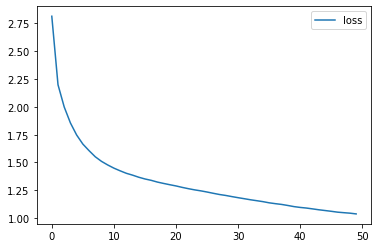

In [19]:
pd.DataFrame(history.history).plot()
plt.show()

In [20]:
# 从checkpoint载入模型
model2  = build_model(vocab_size,
                                 embedding_dim,
                                 rnn_units,
                                 batch_size = 1)
model2.load_weights(tf.train.latest_checkpoint(output_dir))
model2.build(tf.TensorShape([1, None]))
# 文本生成流程：
# start ch sequence A,
# A -> model -> b
# A -> append(b) -> B
# B -> model -> c
# B -> append(c) -> C
# C -> model -> ....

model2.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (1, None, 256)            16640     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (1, None, 1024)           1311744   
_________________________________________________________________
dense_1 (Dense)              (1, None, 65)             66625     
Total params: 1,395,009
Trainable params: 1,395,009
Non-trainable params: 0
_________________________________________________________________


In [21]:
# 利用模型生成文本
def generata_text(model, start_string, num_genetate = 1000):
    input_eval = [char_to_idx[ch] for ch in start_string]
    input_eval = tf.expand_dims(input_eval, 0)#增加维度
    
    text_generated = []
    model.reset_states()
    temperature =0.5
    
    for _ in range(num_genetate):
        # 1. model inference -> predictions
        # 2. sample -> ch -> text_generated.
        # 3. update input_evel
        # predictions : [batch_size, input_eval_len, vocab_size]
        predictions = model(input_eval)
        
        predictions = predictions/temperature
        # predictions : [input_eval_len, vocab_size]
        predictions = tf.squeeze(predictions, 0)#减少维度
        # predictions : [input_eval_len, 1]
        # a b c ->  b c d
        predictions_id = tf.random.categorical(
                predictions, num_samples=1)[-1,0].numpy()
        text_generated.append(idx_to_char[predictions_id])
        input_evel = tf.expand_dims([predictions_id], 0)
    return start_string + ''.join(text_generated)

new_text = generata_text(model2, "All: ")
print(new_text)

All: t'b''''''''''''t''''''''t'''tt''t''tt''t''t'''t''t'''t''t't'ht'tttt'tt'''tt''t''''''t''''''btt'tt'''ttt''a't''''tt'ht'tt'''t't''tt'tt'tmt'b'''t''m'''''t'''t'''t't''bttt''''t't'tttt'''''''tttT'atttt't''tt'''''t't''''tmt'tt'b''''t't''t'tt''''ttt't'''t'tt'tttt''tb'tt'It''t'''''t't''Itt'It''t''tt''ttbt't'''t't'tm'ttt'''ttt'''t''t''tt't''t'ttt't''''tttttt't'''t''''I''st''''t''''tttttttt''t'''s''''''t'ttb't''tSt''''t''t'''tt'btt'It'''tbtt''ttt'tt''tt'''''tt'tttttt''''t'''t''tt't't't''tt't''t'''t''tt'I''t''t'tI'tt'b't''''tt''t'''m'''t''tt't't''tI''ttt''H''tt't'tSt''t'''t'''b'''''t'''t'II''ttt''tttt''t't'tt'tt't'''tt'b''''tt''''tttt''''t''''''t''ttt't'''''t't'''tt't''''tttt't''t'''HtI''tt'''''t''t'tmt'''t't'tt'''t''t'''t'''t'tmt't'ttt't'''''m''tt''''t't'tt't'tm'''tt'tItt'''''t'''''tmtt't'tt''tt'''t''tt''t't''tb''t''I'''tH'b''tt't''tt't''t''tt'tttt'tkt'''t't't't't''tt't''tt'b'''tthtt'ttttt't't''tT''tHt'tt't'bTIIHtts'ttt'tm't't't't'tm''mt''I'ttt''t't't'tt''''ttts't''Im'ttt'ttt''ttt'tI'''tmt